# TASK 2.3 Random Forest

#### Importing libraries and data
#### Import unscaled data and pleasant weather sets (from 2.2)
#### Data Wrangling - choose single decade
#### Reshaping for modeling
#### Data Split
#### Random Forest model
#### Creating Feature Importances
#### Top 3 Weather Station Importances - Maastricht, Dusseldorf, Valentia

## Importing libraries

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [5]:
#Define path
path = r'C:\Users\melan\OneDrive\Career Foundry\Machine Learning with Python\Data Sets'

In [6]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\Machine Learning with Python\\Data Sets'

In [7]:
#Import the cleaned unscaled data
X = pd.read_csv(os.path.join(path, 'unscaled_withdate.csv'), index_col = False)

In [8]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [9]:
#Import the predictions data
pleasant_weather = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [10]:
pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(22950, 137)

In [12]:
pleasant_weather.shape

(22950, 16)

Both X and y have the correct shapes

### Data Wrangling

In [15]:
# Reduce both data sets to one decade - let's choose 2010s
decade_df = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <='2019')].copy()

In [16]:
decade_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4


In [17]:
#we'll also reduce the pleasant_weather set to the 2010s...
decade_pleasant_weather = pleasant_weather[(pleasant_weather['DATE'].astype(str).str[:4] >= '2010') & (pleasant_weather['DATE'].astype(str).str[:4] <='2019')].copy()

In [18]:
decade_pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Set display to show all rows
pd.set_option('display.max_rows', None)

In [20]:
# Let's just see the stations
stations = [col.split('_')[0] for col in decade_df.columns if '_' in col]

In [21]:
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [22]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in decade_df.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] = decade_df[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
DUSSELDORF: 32868 entries
OSLO: 32868 entries
HEATHROW: 32868 entries
MUNCHENB: 32868 entries
BELGRADE: 32868 entries
STOCKHOLM: 32868 entries
LJUBLJANA: 32868 entries
VALENTIA: 32868 entries
BASEL: 32868 entries
DEBILT: 32868 entries
MADRID: 32868 entries
BUDAPEST: 32868 entries
MAASTRICHT: 32868 entries
SONNBLICK: 32868 entries
KASSEL: 32868 entries


In [23]:
# Oh perfect - the same number of entries on EVERY station! The random forest will run better this way.
# So now we take these two dataframes that are BOTH ONLY 2010 and remove the date/month columns
decade_df.drop(['DATE', 'MONTH'], axis = 1, inplace = True)

In [24]:
decade_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,-3.1,2,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,-1.5,6,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4


In [25]:
# here's also the pleasant weather 2010 set...
decade_pleasant_weather.drop(['DATE'], axis = 1, inplace = True)

In [26]:
decade_pleasant_weather.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Reshaping for modeling

We'll create and run the random forest model. Plot figures of at least two different trees and take a screenshot to paste into a document.
#Hint: the shape will be X = (3653, 135) and y = (3653) for one decade of information.

In [29]:
X = decade_df

In [30]:
y = decade_pleasant_weather

In [31]:
# Let's turn them from a dataframe into an array
X = np.array(X)
y = np.array(y)

In [32]:
X.shape

(3652, 135)

In [33]:
y.shape

(3652, 15)

### Data Split

In [35]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### Random Forest Model

In [38]:
# Here we go! Creating the RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5848849945235487


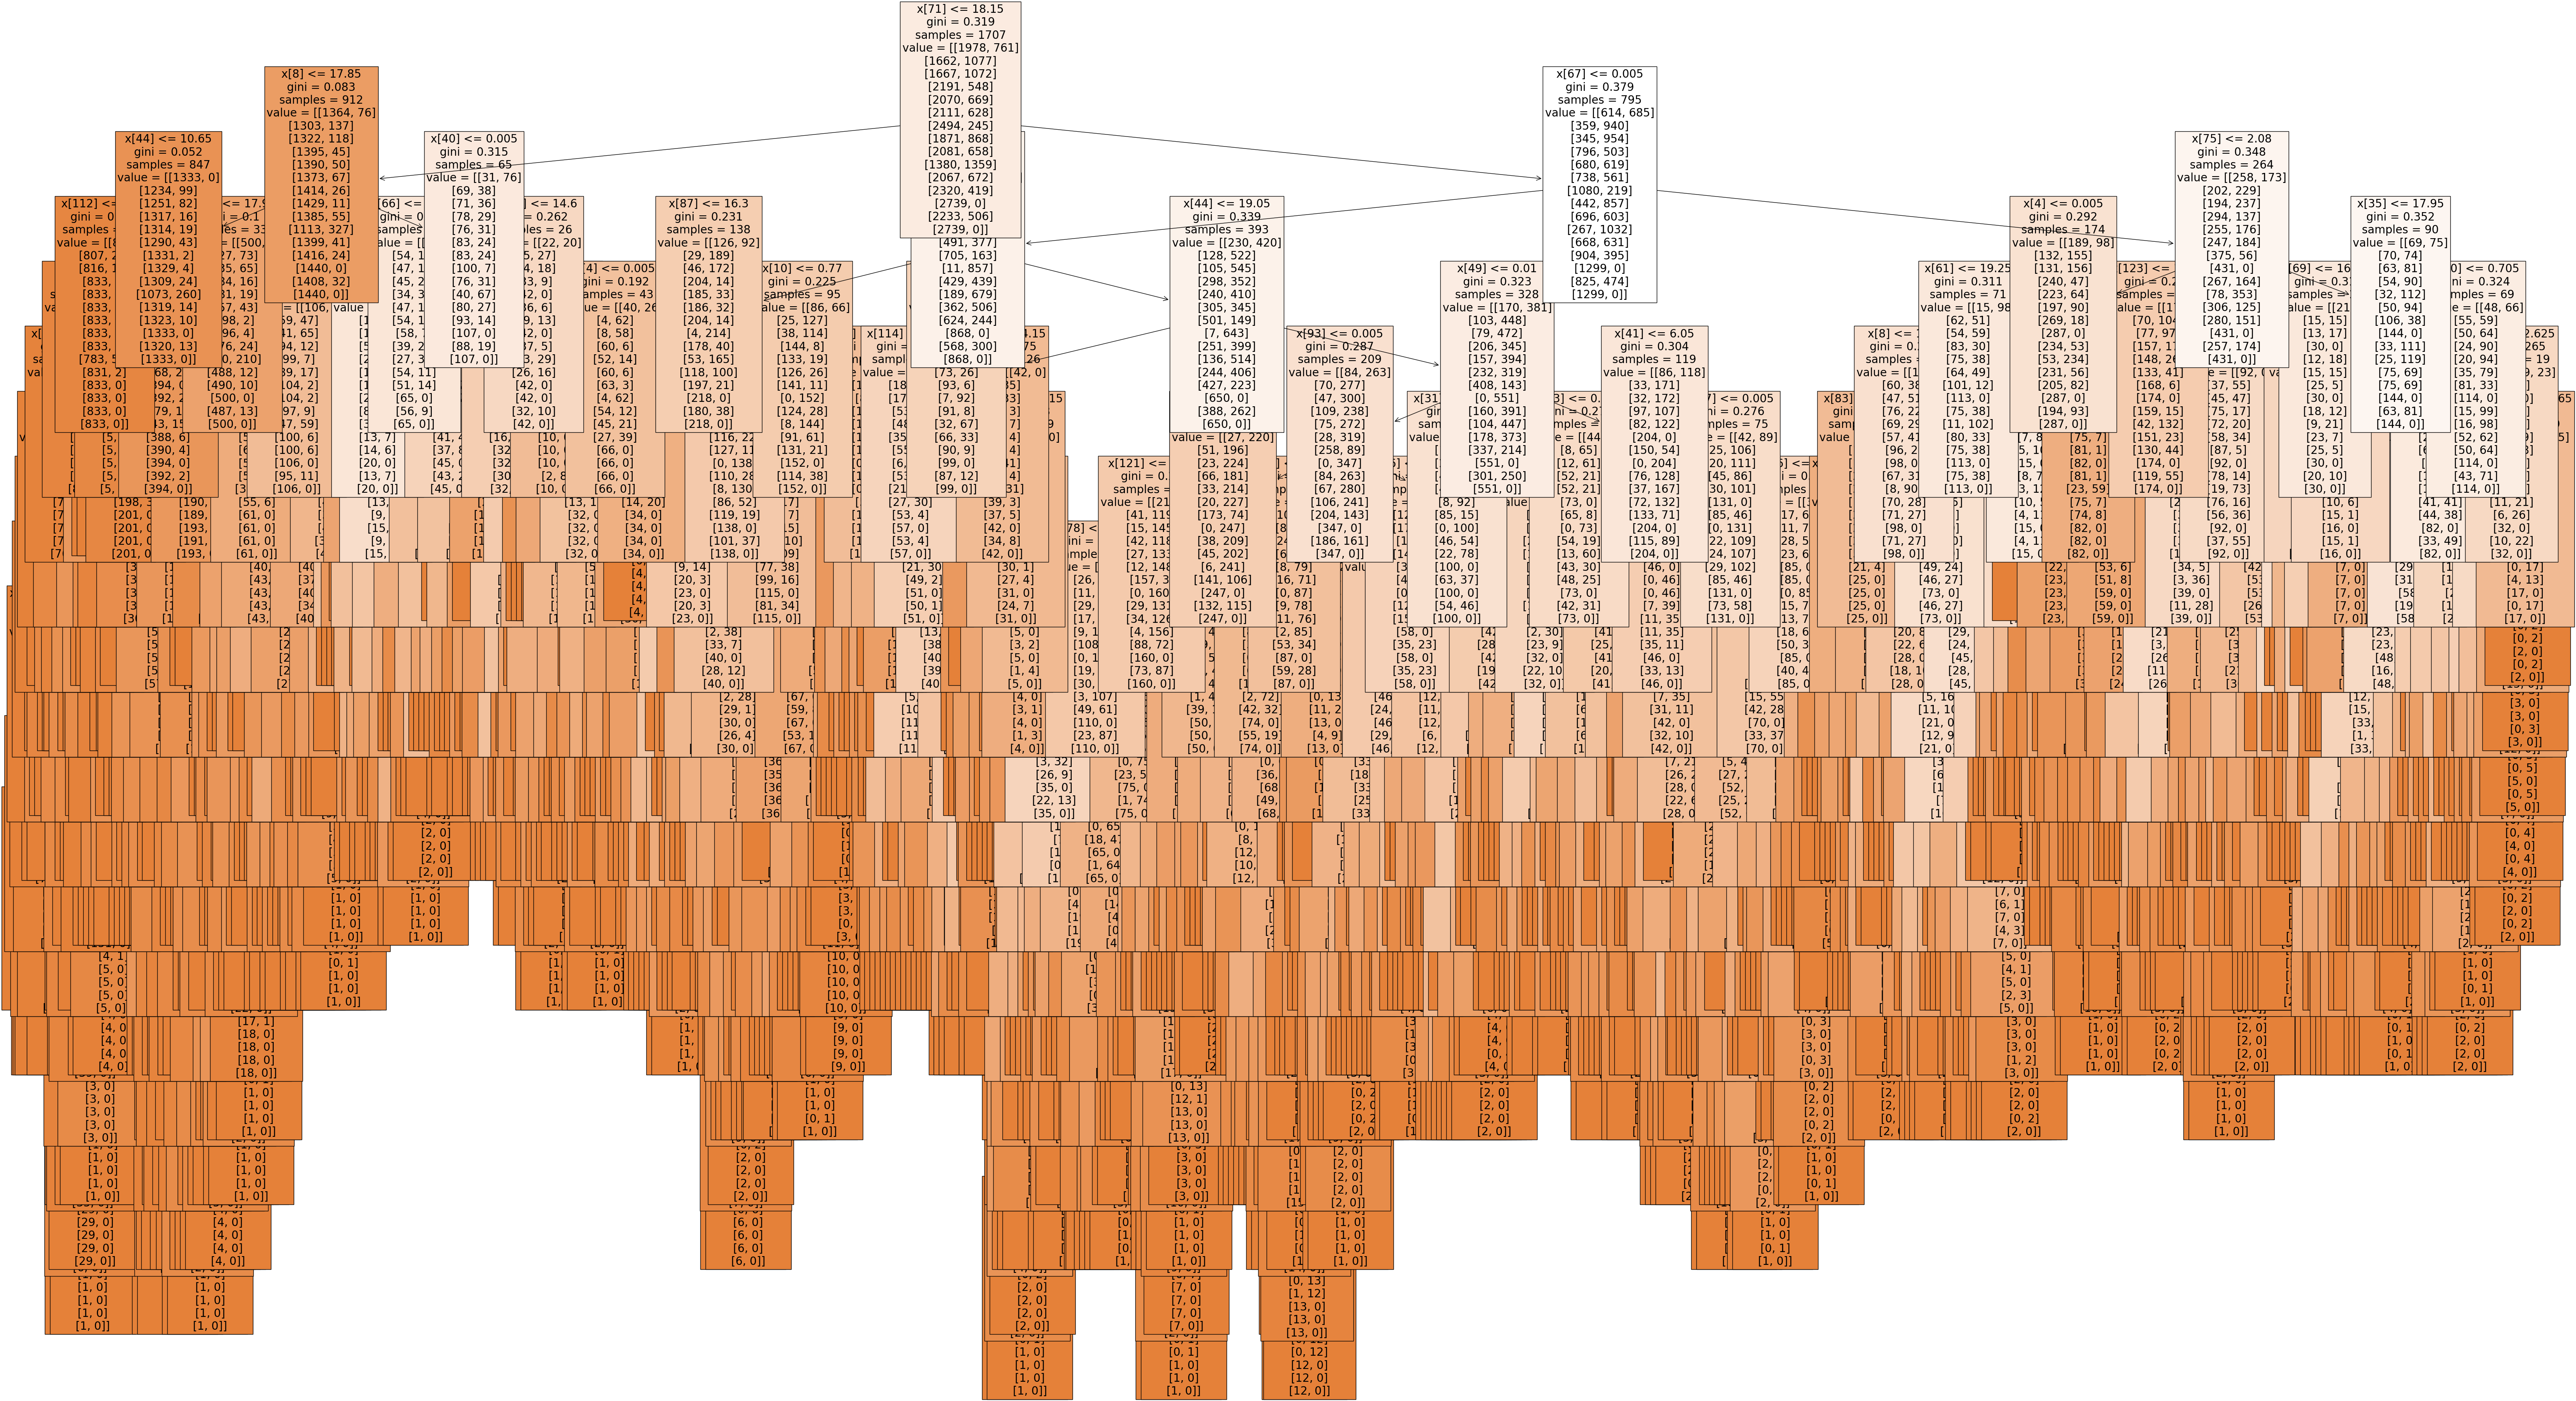

In [41]:
# Class_names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20,filled=True);
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_2010s.png'), bbox_inches='tight')

In [43]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.14976067e-03, 3.65373208e-03, 3.47928524e-03, 3.35778064e-03,
       2.02453830e-02, 1.01008061e-02, 2.34873153e-02, 3.16848821e-03,
       4.16170554e-02, 4.00211091e-03, 3.44215147e-03, 4.20186381e-03,
       2.81836854e-03, 1.52229790e-02, 3.07902993e-03, 5.58978490e-03,
       7.54580110e-03, 1.22789385e-02, 3.45360425e-04, 0.00000000e+00,
       0.00000000e+00, 1.47762641e-03, 1.60507729e-02, 1.48714018e-03,
       1.28416943e-02, 6.26119034e-03, 2.97155315e-02, 2.26821786e-03,
       2.83218135e-03, 4.88682523e-03, 4.35209843e-03, 1.48695883e-02,
       4.85635226e-03, 1.35883713e-02, 2.80940035e-03, 2.71919555e-02,
       2.21997861e-03, 2.94638376e-03, 5.25353669e-03, 4.02672778e-03,
       2.42425261e-02, 6.40710413e-03, 2.67506957e-02, 2.82304885e-03,
       3.23705575e-02, 2.53204903e-03, 4.06622591e-03, 3.59074413e-03,
       4.37752117e-03, 9.86934727e-03, 4.26817235e-03, 1.06651839e-02,
       3.34311022e-03, 1.75859233e-02, 2.83808317e-03, 2.46108829e-03,
      

In [44]:
# Reshape new array
newarray = newarray.reshape (-1, 15, 9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.14976067e-03, 3.65373208e-03, 3.47928524e-03, 3.35778064e-03,
         2.02453830e-02, 1.01008061e-02, 2.34873153e-02, 3.16848821e-03,
         4.16170554e-02],
        [4.00211091e-03, 3.44215147e-03, 4.20186381e-03, 2.81836854e-03,
         1.52229790e-02, 3.07902993e-03, 5.58978490e-03, 7.54580110e-03,
         1.22789385e-02],
        [3.45360425e-04, 0.00000000e+00, 0.00000000e+00, 1.47762641e-03,
         1.60507729e-02, 1.48714018e-03, 1.28416943e-02, 6.26119034e-03,
         2.97155315e-02],
        [2.26821786e-03, 2.83218135e-03, 4.88682523e-03, 4.35209843e-03,
         1.48695883e-02, 4.85635226e-03, 1.35883713e-02, 2.80940035e-03,
         2.71919555e-02],
        [2.21997861e-03, 2.94638376e-03, 5.25353669e-03, 4.02672778e-03,
         2.42425261e-02, 6.40710413e-03, 2.67506957e-02, 2.82304885e-03,
         3.23705575e-02],
        [2.53204903e-03, 4.06622591e-03, 3.59074413e-03, 4.37752117e-03,
         9.86934727e-03, 4.26817235e-03, 1.06651839e-02, 3.34311022

In [45]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis = 1)
sumarray

array([0.11225961, 0.05818103, 0.06817932, 0.07765499, 0.10704056,
       0.06029828, 0.03095837, 0.07936355, 0.10066939, 0.06858467,
       0.07904605, 0.06212595, 0.03125665, 0.05996818, 0.00441342])

In [46]:
# Convert the set of new stations to a list
unique_stations_list = list(unique_stations)

In [47]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

DUSSELDORF    0.112260
BELGRADE      0.107041
BASEL         0.100669
VALENTIA      0.079364
MADRID        0.079046
MUNCHENB      0.077655
DEBILT        0.068585
HEATHROW      0.068179
BUDAPEST      0.062126
STOCKHOLM     0.060298
SONNBLICK     0.059968
OSLO          0.058181
MAASTRICHT    0.031257
LJUBLJANA     0.030958
KASSEL        0.004413
dtype: float64

In [48]:
# Create a dataframe to associate weather stations with their importances
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})
df_importance = df_importance.sort_values(by = 'Importance', ascending = False)

['DUSSELDORF', 'OSLO', 'HEATHROW', 'MUNCHENB', 'BELGRADE', 'STOCKHOLM', 'LJUBLJANA', 'VALENTIA', 'BASEL', 'DEBILT', 'MADRID', 'BUDAPEST', 'MAASTRICHT', 'SONNBLICK', 'KASSEL']


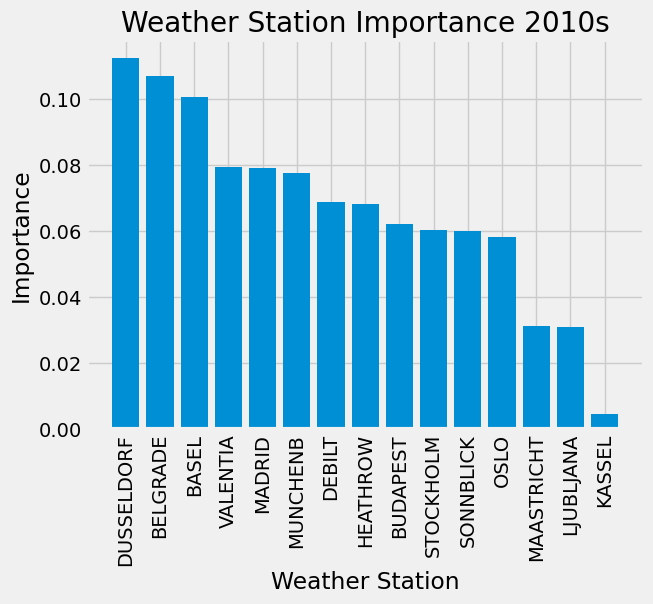

In [49]:
# Plot the Weather Station Importances for 2010!
%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path, 'Visualizations', '2010s_feature_importances.png'), bbox_inches='tight')
plt.show()